<a href="https://colab.research.google.com/github/xSupernovaa/NLP-Topic-Modelling/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Data Reading

In [49]:
# Data loading
from google.colab import drive
import zipfile
import pandas as pd
import gdown

# EDA
import matplotlib.pyplot as plt
import seaborn as sns


# Util
from tqdm import tqdm
from pprint import pprint


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_URL = "https://drive.google.com/file/d/10YvMpIzRSi_GXg91TkrQBL_3JKC5dni7/view?usp=sharing"

In [4]:
gdown.download(DATA_URL, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=10YvMpIzRSi_GXg91TkrQBL_3JKC5dni7
To: /content/articles1.csv.zip
100%|██████████| 77.4M/77.4M [00:01<00:00, 62.5MB/s]


'articles1.csv.zip'

In [5]:
DATA_PATH = "articles1.csv.zip"

In [6]:
# Extract the CSV file from the zip archive
with zipfile.ZipFile(DATA_PATH, "r") as zip_ref:
    zip_ref.extractall()

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv("articles1.csv")

In [7]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


# EDA

In [23]:
sns.set_style("darkgrid")

Let's start by dropping unimportant columns

In [11]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [12]:
print("Null values count: ")
df.isnull().sum()

Null values count: 


id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

all data is missing their `url`, some of them are missing their `author` 

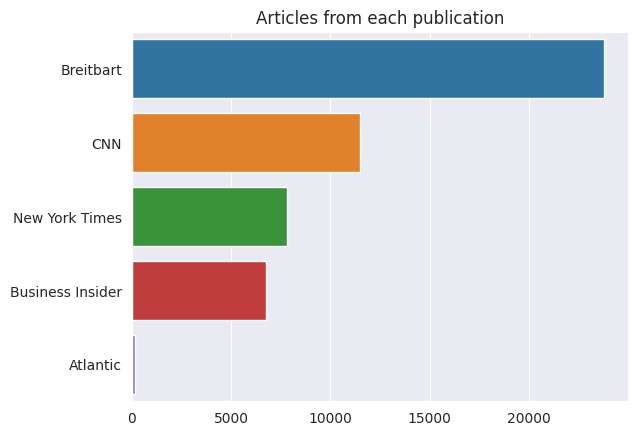

In [27]:
value_counts = df['publication'].value_counts()
sns.barplot(x=value_counts.values, y=value_counts.index)
plt.title("Articles from each publication")
plt.show()

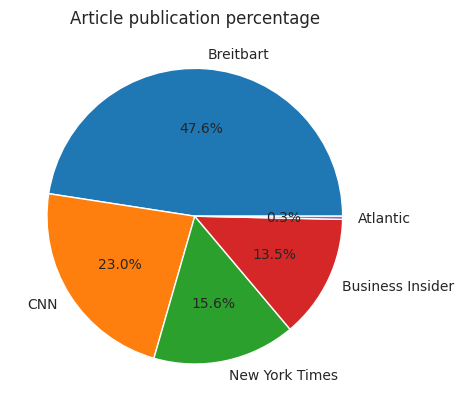

In [48]:
plt.pie(df['publication'].value_counts(normalize=True), labels=values_counts.index, autopct='%1.1f%%')
plt.title("Article publication percentage")
plt.show()